# Better vdt cos

## Setup PATH

In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

## Import all the things

In [2]:

import fpcore
import lambdas

from interval import Interval
from lambdas import *
from numeric_types import FP64
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda
from fpcore.interface import *

In [3]:
x = var("x")
samples = 2**19

2023-06-29 15:18:43.080775 add: type_check: In function: (FPCore (x)  (- (+ (cos x) (/ (* x x) (! :precision integer 2))) (! :precision integer 1)))
2023-06-29 15:18:43.167080 add: type_check: Out function: (FPCore  (x)  (+ (cos x) (* (* x x) (- (/ 1 2) (/ 1 2)))))


<Axes: title={'center': 'Absolute error for Existing Cos'}, xlabel='Input', ylabel='Error'>

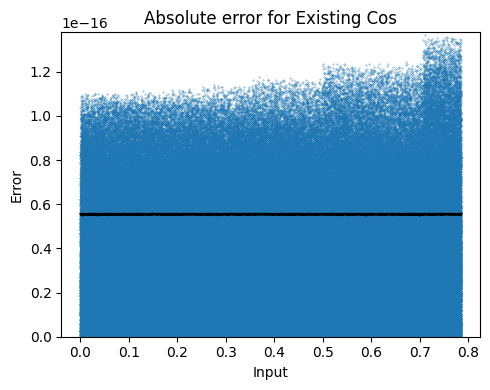

In [4]:
old_cos = \
Add(
    fpcore.parse_expr("(- 1 (* (* x x) 0.5))"),
        Horner(
            FixedPolynomial(
                make_function([x], cos(x) + x*x/2 - 1),
                Interval(-PI/4, PI/4),
                [4, 6, 8, 10, 12, 14],
                ["4.16666666666665929218E-2",
                "-1.38888888888730564116E-3",
                "2.48015872888517045348E-5",
                "-2.75573141792967388112E-7",
                "2.08757008419747316778E-9",
                "-1.13585365213876817300E-11"])))
plot_lambda(Interval(0, PI/4), old_cos, "Existing Cos", samples)

array([<Axes: title={'center': 'Absolute error for Existing Cos'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V0 Cos'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

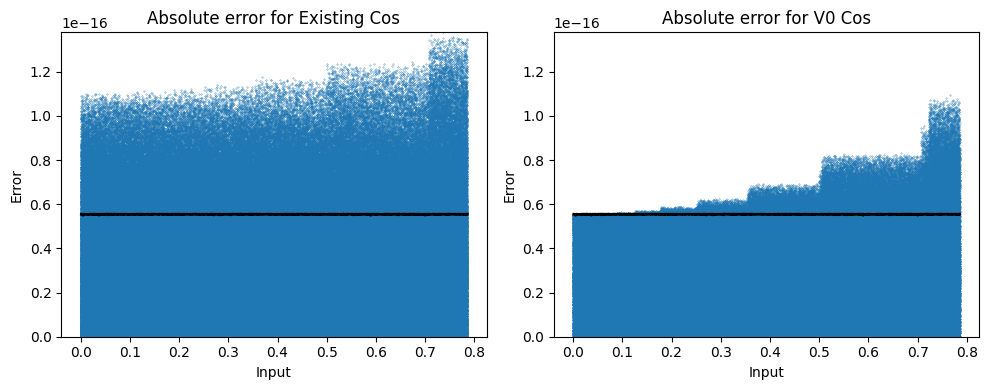

In [15]:
v0_cos = \
    Horner(
        FixedPolynomial(
            make_function([x], cos(x)),
            Interval(-PI / 4, PI / 4),
            [0, 2, 4, 6, 8, 10, 12, 14],
            ["1",
             "-0.5",
             "4.16666666666665929218E-2",
             "-1.38888888888730564116E-3",
             "2.48015872888517045348E-5",
             "-2.75573141792967388112E-7",
             "2.08757008419747316778E-9",
             "-1.13585365213876817300E-11"]),
             split=2)

compare_plot_lambda(Interval(0, PI/4), old_cos, v0_cos, "Existing Cos", "V0 Cos", samples)


array([<Axes: title={'center': 'Absolute error for V0 Cos'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V1 Cos'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

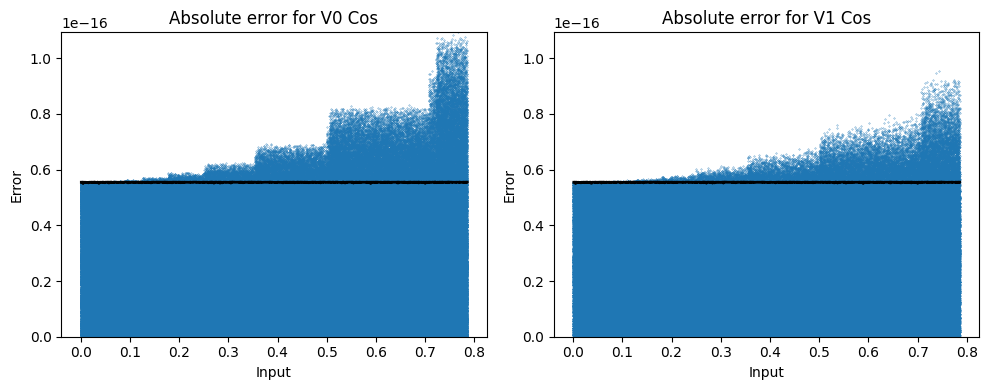

In [20]:
v1_cos = \
    Horner(
        FixedPolynomial(
            make_function([x], cos(x)),
            Interval(-PI / 4, PI / 4),
            [0, 2, 4, 6, 8, 10, 12, 14],
            ["1",
             "-0.5",
             "4.16666666666665929218E-2",
             "-1.38888888888730564116E-3",
             "2.48015872888517045348E-5",
             "-2.75573141792967388112E-7",
             "2.08757008419747316778E-9",
             "-1.13585365213876817300E-11"]),
             split=1)
compare_plot_lambda(Interval(0, PI/4), v0_cos, v1_cos, "V0 Cos", "V1 Cos", samples)

array([<Axes: title={'center': 'Absolute error for V1 Cos'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V2 Cos'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

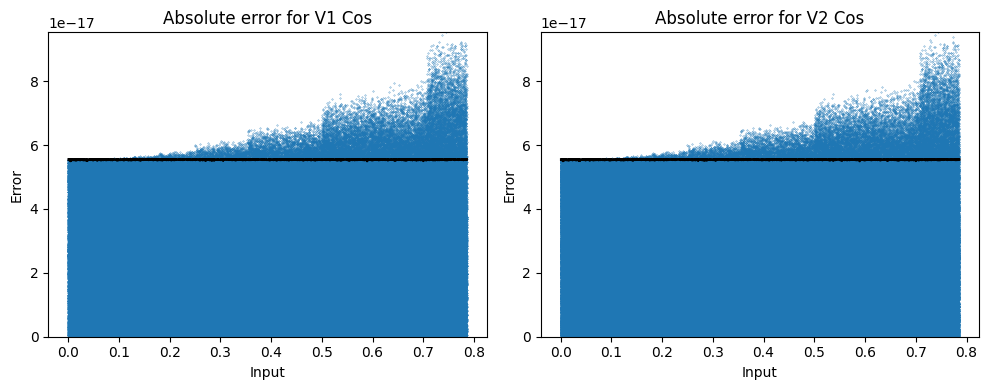

In [28]:
v2_cos = \
Horner(
    MinimaxPolynomial(
        make_function([x], cos(x)),
        Interval(0, PI/4),
        8
    ),
    split=1
)
compare_plot_lambda(Interval(0, PI/4), v1_cos, v2_cos, "V1 Cos", "V2 Cos", samples)

In [8]:
v3_cos = \
Estrin(
    MinimaxPolynomial(
        make_function([x], cos(x)),
        Interval(0, PI/4),
        8
    )
)
#compare_plot_lambda(Interval(0, PI/4), v0_cos, v3_cos, "V0 Cos", "V3 Cos", samples)

## Now the sin

<Axes: title={'center': 'Absolute error for Existing Sin'}, xlabel='Input', ylabel='Error'>

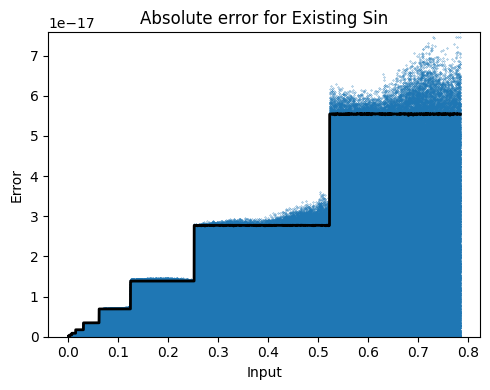

In [9]:
old_sin = \
    Horner(
        FixedPolynomial(
            make_function([x], sin(x)),
            Interval(-PI/4, PI/4),
            [1, 3, 5, 7, 9, 11, 13],
            ["1",
             "-1.66666666666666307295E-1",
             "8.33333333332211858878E-3",
             "-1.98412698295895385996E-4",
             "2.75573136213857245213E-6",
             "-2.50507477628578072866E-8",
             "1.58962301576546568060E-10"]),
        split=1)
plot_lambda(Interval(0, PI/4), old_sin, "Existing Sin", samples)

array([<Axes: title={'center': 'Absolute error for Existing Sin'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V0 Sin'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

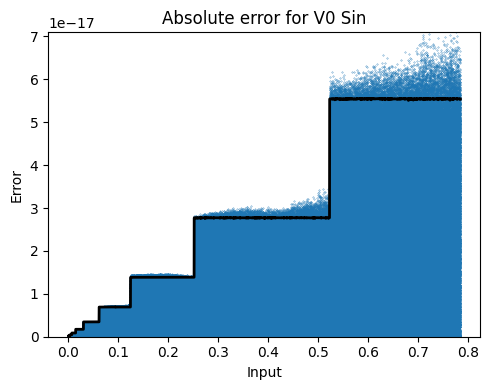

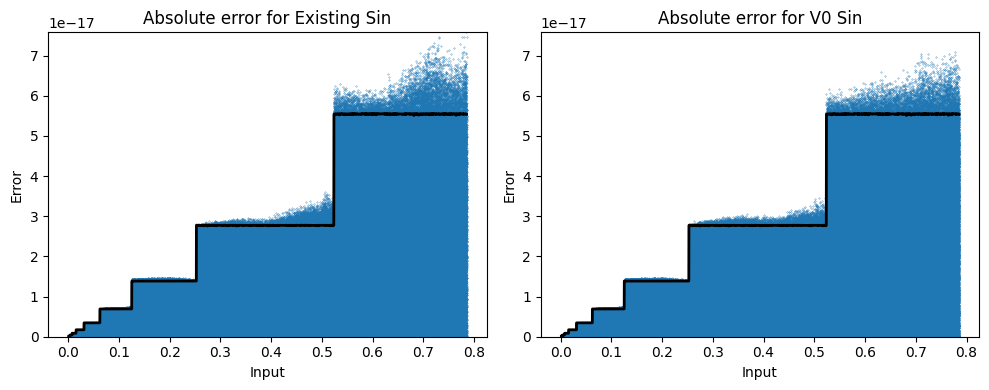

In [10]:
v0_sin = \
Horner(
    MinimaxPolynomial(
        make_function([x], sin(x)),
        Interval(0, PI/4),
        7
    ),
    split=1
)
plot_lambda(Interval(0, PI/4), v0_sin, "V0 Sin", samples)
compare_plot_lambda(Interval(0, PI/4), old_sin, v0_sin, "Existing Sin", "V0 Sin", samples)

array([<Axes: title={'center': 'Absolute error for V0 Sin'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V1 Sin'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

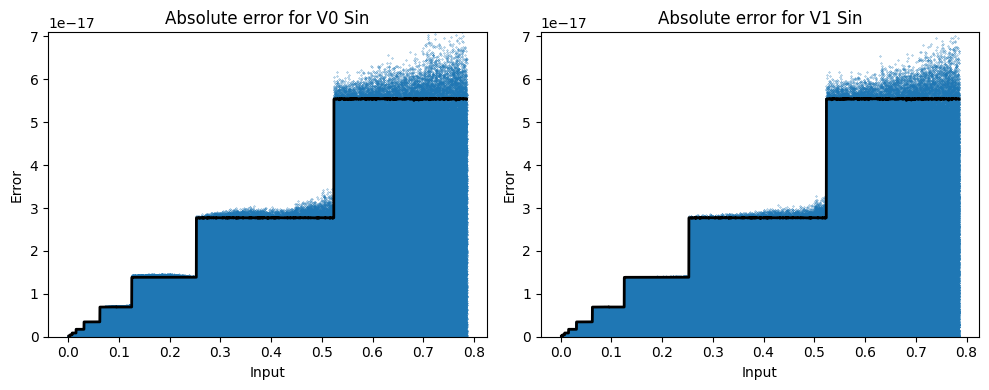

In [11]:
v1_sin = \
Horner(
    MinimaxPolynomial(
        make_function([x], sin(x)),
        Interval(0, PI/4),
        8
    ),
    split=1
)
compare_plot_lambda(Interval(0, PI/4), v0_sin, v1_sin, "V0 Sin", "V1 Sin", samples)

array([<Axes: title={'center': 'Absolute error for V0 Sin'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V2 Sin'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

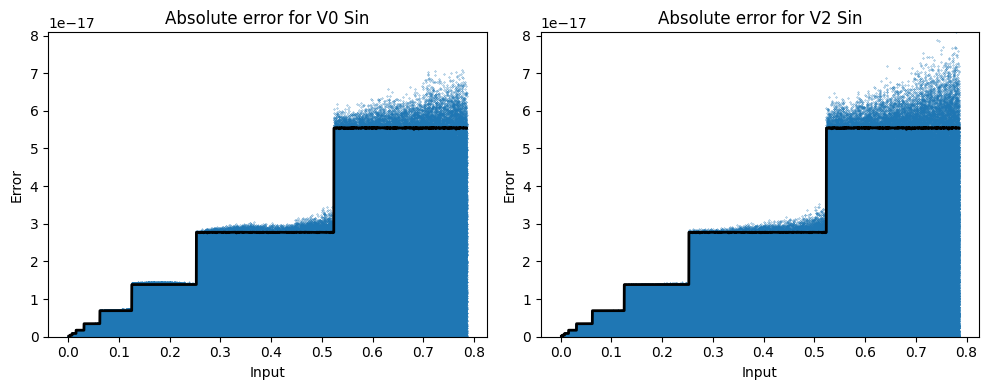

In [12]:
v2_sin = \
Estrin(
    MinimaxPolynomial(
        make_function([x], sin(x)),
        Interval(0, PI/4),
        10
    ),
    split=1
)
compare_plot_lambda(Interval(0, PI/4), v0_sin, v2_sin, "V0 Sin", "V2 Sin", samples)